<a href="https://www.kaggle.com/code/patimejia/solutions-tests-fastai-02-production?scriptVersionId=118656452" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Install or Update Fastai and DuckDuckGo Versions

In [1]:
!python -m pip list | grep fast

fastai                                2.7.10
fastapi                               0.89.1
fastavro                              1.5.2
fastcore                              1.5.27
fastdownload                          0.0.7
fasteners                             0.17.3
fastjsonschema                        2.15.3
fastprogress                          1.0.3
fasttext                              0.9.2
pyfasttext                            0.4.6


check for duck duck go

In [2]:
!python -m pip list | grep 'du\|dd'

giddy                                 2.3.3
google-cloud-scheduler                2.6.4
mdurl                                 0.1.0
pyasn1-modules                        0.2.7
pydub                                 0.25.1
sklearn-contrib-py-earth              0.1.0+1.gdde5f89
tensorflow-addons                     0.14.0


Therefore, there is no installation of `duckduckgo` or any library with `du` or `dd` in its filename.

Install `duckduckgo_search` with `pip`:

In [3]:
!pip install -Uqq duckduckgo_search fastai


- `pip` is a recursive acronym that can stand for either "Pip Installs Packages" or "Pip Installs Python".
- `pip` is a command line tool for installing and managing Python packages, otherwise known as modules or libraries. Non-Python packages can also be installed using `pip` such as Java, C, C++, and Fortran libraries.
- `install` is a subcommand of `pip` that installs packages.
- `-U` is an option of `pip install` that upgrades the package to the latest version.
- `-qq` is an option of `pip install` that suppresses the output of the command.
- `duckduckgo_search` is the name of the package to install. It is a Python wrapper for the DuckDuckGo search engine and is available on PyPI. 
- `duckduckgo_search` is a dependency of `fastai` and is not installed by default.
- [documentation](https://pypi.org/project/duckduckgo-search/#3-ddg_images---image-search-by-duckduckgocom) for `duckduckgo_search`


In [4]:
!python -m pip list | grep 'du\|dd\|fast'

duckduckgo-search                     2.8.0
fastai                                2.7.10
fastapi                               0.89.1
fastavro                              1.5.2
fastcore                              1.5.27
fastdownload                          0.0.7
fasteners                             0.17.3
fastjsonschema                        2.15.3
fastprogress                          1.0.3
fasttext                              0.9.2
giddy                                 2.3.3
google-cloud-scheduler                2.6.4
mdurl                                 0.1.0
pyasn1-modules                        0.2.7
pydub                                 0.25.1
pyfasttext                            0.4.6
sklearn-contrib-py-earth              0.1.0+1.gdde5f89
tensorflow-addons                     0.14.0


shows `duckduckgo-search` verision 2.8.0 has been installed and `fastai` latest version

## Test: Installation and Import Process

In [5]:
def test_imports():
    try:
        import fastai
        import duckduckgo_search
        import fastdownload
    except ImportError as e:
        print(f'Import failed: {e}')
        return

    print(f'fastai version: {fastai.__version__}')
    print(f'duckduckgo_search version: {duckduckgo_search.__version__}')
    print(f'fastdownload version: {fastdownload.__version__}')
    print('Success! All import calls were successful.')


test_imports()

fastai version: 2.7.10
duckduckgo_search version: 2.8.0
fastdownload version: 0.0.7
Success! All import calls were successful.


# Collecting Data
## Create the Image Search Function

In [6]:
from duckduckgo_search import ddg_images
from fastai.vision.all import *


def search_image_urls(term:str, max_images:int, min_sz:int)->List:
    print(f"Searching for {term} images with a minimum size of {min_sz}x{min_sz} pixels and a maximum of {max_images} images.")
    results = ddg_images(term, max_results=max_images)
    images = [result.get('image') for result in results if result.get('width')>min_sz and result.get('height')>min_sz]
    return L(images).unique().sorted()

- The code imports the `ddg_images` function from the `duckduckgo_search"`library and the `L` function and everything else from the `fastai.vision.all` module.
- A function `search_image_urls` is defined that takes in three arguments:
    - `term`: a string representing the search term.
    - `max_images`: the maximum number of images to be returned.
    - `min_sz`: the minimum size of images to be returned.
- The code prints a message indicating that it is searching for images using the search term.
- The `ddg_images` function is called with the search term and the maximum number of images to be returned, and the result is stored in the `results` variable.
- A list comprehension is used to filter the `results` to only include images that have a width and height greater than the `min_sz` value. The filtered images are stored in the `images` variable.
- The code creates a fastai.core.List object using the `L` function and applies the `unique()` and `sorted()` methods to it to remove duplicate URLs and sort the list, respectively.
- The result is returned as the output of the function.

In [7]:
term = 'Umbelliferae seeds'
min_sz=128
max_images=150 

url_list = search_image_urls(term, max_images, min_sz) 

Searching for Umbelliferae seeds images with a minimum size of 128x128 pixels and a maximum of 150 images.


## Test: Image Search Function

In [8]:
def test_search_image_urls(url_list, number_of_results_to_print): 
    try:
        url_list = search_image_urls(term, max_images, min_sz)
    except Exception as e:
        print(f'Test failed: {e}')
        return

    print(f'Number of images found: {len(url_list)}')
    print(f'Number of duplicates: {len(url_list)-len(url_list.unique())}')
    print(f'Number of images dropped due to size: {max_images-len(url_list)}')
    print(f'Number of images kept: {len(url_list)}')
    print(f'Number of images to print: {number_of_results_to_print}')
    print('Success! The search_image_urls function works as expected.')
    print(f'Here are some sample urls: {url_list[:number_of_results_to_print]}')

In [9]:
test_search_image_urls(url_list,3)

Searching for Umbelliferae seeds images with a minimum size of 128x128 pixels and a maximum of 150 images.
Number of images found: 148
Number of duplicates: 0
Number of images dropped due to size: 2
Number of images kept: 148
Number of images to print: 3
Success! The search_image_urls function works as expected.
Here are some sample urls: ['http://2.bp.blogspot.com/-E2ElRb0KWvg/UOZKbjOgvsI/AAAAAAAAACs/fr7Agrbpy-s/s1600/352-angelica_archangelica.jpg', 'http://2.imimg.com/data2/SG/IV/MY-4803695/ajwain-250x250.jpg', 'http://4.bp.blogspot.com/_XL7yfnrTcTk/Skk_OO7I5ZI/AAAAAAAABoA/lVeefM28CJU/w1200-h630-p-k-no-nu/Carom+Seeds.jpg']


## Test: Image Download and Save
Testing the process of downloading a single image from a URL, saving it to a path, and opening it

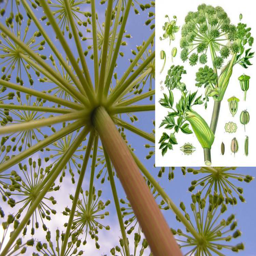

In [10]:
from fastdownload import download_url

dest = 'tests/test_image.jpg'
download_url(url_list[0], dest, show_progress=true)

im = Image.open(dest)
im = im.resize((256, 256))
im.save(dest)
im

- Set image destination path `dest`
- Download first URL in `url_list` to `dest` with progress shown
- Open `dest` using `Image.open` method from the `PIL` library (Python Imaging Library).
- Resize to 256x256 with `resize` method
- Overwrite original with resized image and save to `dest`
- Display the resized image, `im`

In [11]:
path = Path('tests')
fns = get_image_files(path)
fns

(#1) [Path('tests/test_image.jpg')]

- Define a Path object called `path` for the directory `tests`
- Get all image files within `tests` directory using `get_image_files`
- Store file paths in `fns`, a list of filenames
- Display the list of filenames, `fns`, in the `tests` folder

# Fetch Images with Fastai's download_images
Using fastai's download_images to fetch all the URLs for each search term and store them in individual folders

### Hello Search

In [12]:
seed_types = 'caraway seeds', 'ajwain seeds', 'fennel seeds'
path = Path('seeds')

In [13]:
if not path.exists():
    path.mkdir()
for seed_type in seed_types:
    dest = (path/seed_type)
    dest.mkdir(exist_ok=True)
    results = search_image_urls(seed_type, 150, 128)
    download_images(dest, urls=results)


Searching for caraway seeds images with a minimum size of 128x128 pixels and a maximum of 150 images.
Searching for ajwain seeds images with a minimum size of 128x128 pixels and a maximum of 150 images.
Searching for fennel seeds images with a minimum size of 128x128 pixels and a maximum of 150 images.


- `if not path.exists()`: checks if a directory exists at the given path. If it does not exist, it creates the directory using `path.mkdir()`.
- The code then enters a for loop `for seed_type in seed_types`.
- `dest = (path/seed_type)` creates a new directory path by combining the path with the current`seed_type` in the loop.
- `dest.mkdir(exist_ok=True)` creates a directory at the `dest` path. The `exist_ok argument` is set to `True`, which means that if the directory already exists, it will not raise an error.
- `results = search_image_urls(seed_type, 150, 128)` retrieves a **list of image URLs** by calling the function `search_image_urls` with `seed_type`, `150`, and `128` as arguments.
- Finally, the code calls the function `download_images` with the **`dest` path** and the **`results`, list of image URLs**, as arguments, to download the images to the specified directory.

## testing 

In [14]:
fns = get_image_files(path)
fns


(#414) [Path('seeds/caraway seeds/9621adf2-0007-4b7c-80b8-32145f28c063.jpg'),Path('seeds/caraway seeds/b5daaced-3c22-42d3-8dc8-f89d64452ac2.jpg'),Path('seeds/caraway seeds/93325217-c050-42cc-8017-377aea8015fb.jpg'),Path('seeds/caraway seeds/f858da83-82bd-464b-a514-3cbdd31f31d4.jpg'),Path('seeds/caraway seeds/7aec0450-3731-4deb-88ea-852d9a026f6d.jpg'),Path('seeds/caraway seeds/fcf3bfeb-6c09-4031-b1fd-3e3729ba77c5.jpg'),Path('seeds/caraway seeds/9176b2b2-afe5-4e03-9ea3-5bc9b5f7fe4f.jpg'),Path('seeds/caraway seeds/4e4ce420-21e7-4294-adc9-60c23a5bb625.jpg'),Path('seeds/caraway seeds/74469a9a-0e37-43f4-ae9c-60054079b7b2.jpg'),Path('seeds/caraway seeds/7e62c69d-3ce5-49be-9fc1-2be24531be13.jpg')...]

- `fns = get_image_files(path)` calls the function `get_image_files` and passes the **`path`** as an argument. This function is expected to return a list of filenames of the image files located in the directory at the given path. The returned list of filenames is assigned to the variable `fns`.
- The last line of the code, `fns`, returns the value of the fns variable. This line serves no functional purpose. It is used for debugging or for testing. The result of this line would be the list of filenames that was assigned to the fns variable in the first line

In [15]:
len(fns)

414

- `len(fns)`:
    - Calculates the length of a collection object stored in the fns variable.
    - Returns an integer value representing the number of elements in the fns list.
    - Determines the number of filenames stored in the fns list.

In [16]:
for seed_type in seed_types:
    print(f'Start: number of {seed_type} images: {len(get_image_files(path/seed_type))}')
print(f'Start: total number of images: {sum([len(get_image_files(path/seed_type)) for seed_type in seed_types])}')


Start: number of caraway seeds images: 138
Start: number of ajwain seeds images: 138
Start: number of fennel seeds images: 138
Start: total number of images: 414


In [17]:
failed = verify_images(fns)
print(f'Number of images deleted: {len(failed)}')
failed


Number of images deleted: 3


(#3) [Path('seeds/caraway seeds/2e42bbd9-4ad2-426a-aaff-98958c0f2f88.jpg'),Path('seeds/caraway seeds/bc23fa24-95ac-483d-93d9-97cc8f52d6a4.jpg'),Path('seeds/ajwain seeds/33d199ff-3912-43fc-97c8-eedd011f14c8.jpg')]

- `failed` variable stores the result of `verify_images` function with **`fns`** as an argument.
- `verify_images` returns a list of images that failed to download or open correctly.
- The validation process is performed in parallel and the order of the list is not guaranteed to match the input list.
- The list may contain duplicates.
- The validation test is performed by opening the image with `PIL` and checking if the image is **not empty**.
- Empty image may indicate corruption, unsupported format (`gif`, `png` with **alpha channel**), or mismatched file extension.
- The validation test is not perfect but it is suitable for the purpose.

In [18]:
failed.map(Path.unlink);

- `failed.map(Path.unlink)` calls the `map` method on the failed variable, which is a list of filenames that failed the image verification test.
- The `map` method applies the `Path.unlink` function to each element of the list.
- `Path.unlink` is a method of the `Path` class from the `pathlib` module in Python, which deletes the file at the given path.
- Here, `Path.unlink` is used to delete each of the files in the failed list.
- The semicolon `;` at the end of the line is used to suppress the return value of the function.

In [19]:
for seed_type in seed_types:
    print(f'End: number of {seed_type} images: {len(get_image_files(path/seed_type))}')

print(f'Start number of images found: {len(fns)}')
print(f'End number of images: {sum([len(get_image_files(path/seed_type)) for seed_type in seed_types])}')
print(f'Number of images deleted: {len(failed)}')

End: number of caraway seeds images: 136
End: number of ajwain seeds images: 137
End: number of fennel seeds images: 138
Start number of images found: 414
End number of images: 411
Number of images deleted: 3


# Data Loader

In [20]:
seeds = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

## Data augmentation: fractal vs. non-fractal

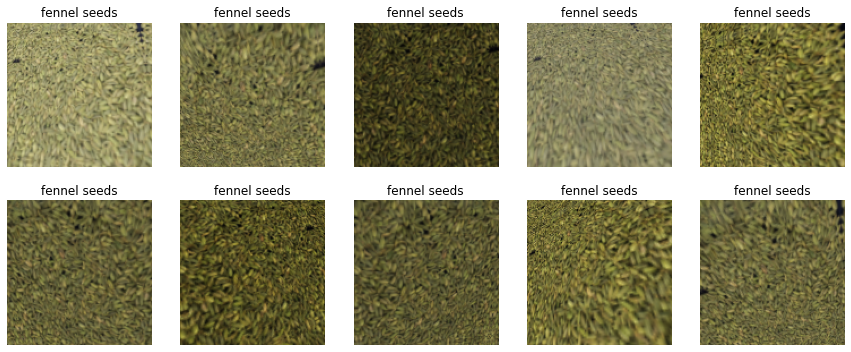

In [21]:
seeds = seeds.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = seeds.dataloaders(path, num_workers=0)
dls.train.show_batch(max_n=10, nrows=2, unique=True)

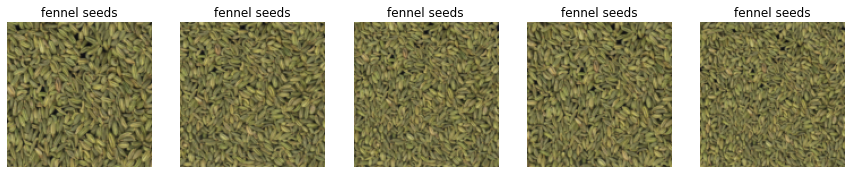

In [22]:
seeds = seeds.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = seeds.dataloaders(path, num_workers=0)
dls.train.show_batch(max_n=5, nrows=1, unique=True)

We selected `RandomResizedCrop` as it retains the geometric, symmetric and fractal features of seeds, making it ideal for analyzing natural patterns. Unlike the `aug_transforms` method, it doesn't alter the calculated fractals of nature. For non-fractal objects like ***teddy bears***, the `aug_transforms` method is a better option. The former method feels like observing a subject under a moving microscope, while the latter feels like inspecting a close-up item while walking.

# Train the model

### Hello Learner

In [23]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [24]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.794240,1.958359,0.573171,00:19


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,1.223917,1.086173,0.414634,00:22
1,1.056437,1.268808,0.390244,00:22
2,0.857180,1.198048,0.378049,00:22
3,0.744427,1.164376,0.390244,00:22


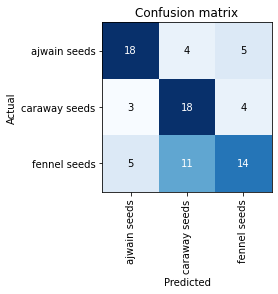

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

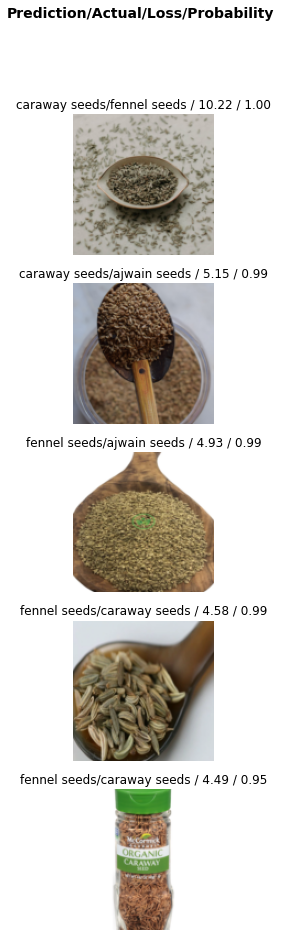

In [26]:
interp.plot_top_losses(5, nrows=5)


In [27]:
from fastai.vision.widgets import *

cleaner = ImageClassifierCleaner(learn)
print(f'Number of images before deleting: {len(cleaner.fns)}')

Number of images before deleting: 30


In [28]:
cleaner

In [29]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [30]:
learn.export()

In [31]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [32]:
learn_inf = load_learner(path/'export.pkl')

In [33]:
learn_inf.predict('tests/test_image.jpg')

('fennel seeds', TensorBase(2), TensorBase([0.2270, 0.1614, 0.6116]))

In [34]:
learn_inf.dls.vocab

['ajwain seeds', 'caraway seeds', 'fennel seeds']

In [35]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [36]:
btn_upload = SimpleNamespace(data = ['tests/test_image.jpg'])

In [37]:
img = PILImage.create(btn_upload.data[-1])

In [38]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [39]:
pred,pred_idx,probs = learn_inf.predict(img)

In [40]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: fennel seeds; Probability: 0.6116')

In [41]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [42]:
def on_click_classify(change):

    img = PILImage.create(btn_upload.data[-1])

    out_pl.clear_output()

    with out_pl: display(img.to_thumb(128,128))

    pred,pred_idx,probs = learn_inf.predict(img)

    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [43]:
btn_upload = widgets.FileUpload()

### Hello Seed Classifier

In [44]:
VBox([widgets.Label('Select your seed!'), btn_upload, btn_run, out_pl, lbl_pred])